# Logistic Regression

### 공부 시간에 따른 자격증 시험 합격 가능성

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

In [3]:
dataset = pd.read_csv('LogisticRegressionData.csv')
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values
X,y

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1],
       dtype=int64))

## 데이터 분리

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

### 학습(로지스틱 회귀 모델)

In [6]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,y_train)

LogisticRegression()

In [7]:
classifier.score(X_train,y_train)

0.875

### 6시간 공부했을 때 예측?

In [9]:
classifier.predict([[6]])
# 결과 1은 합격 예측

array([1], dtype=int64)

In [11]:
classifier.predict_proba([[6]])
# 불합격 확률 14프로, 합격확률 0.8

array([[0.14150735, 0.85849265]])

### 4시간 공부했을 때 예측?

In [10]:
classifier.predict([[4]])
# 결과 0은 불합격 예측

array([0], dtype=int64)

In [12]:
classifier.predict_proba([[4]])
# 불합격 확률 62프로 합격확률 37프로

array([[0.6249966, 0.3750034]])

### 분류 결과 예측 (테스트)

In [13]:
y_pred = classifier.predict(X_test)
y_pred, y_test

(array([1, 0, 1, 1], dtype=int64), array([1, 0, 1, 0], dtype=int64))

In [14]:
classifier.score(X_test,y_test)

0.75

   ### 데이터 시각화 (훈련세트)

In [37]:
X_range = np.arange(min(X),max(X),0.1)
X_range

array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7,
       1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. ,
       3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3,
       4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6,
       5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9,
       7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8. , 8.1, 8.2,
       8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1, 9.2, 9.3, 9.4, 9.5,
       9.6, 9.7, 9.8, 9.9])

In [40]:
p = 1 / (1 + np.exp(-(classifier.coef_ * X_range + classifier.intercept_)))
p = p.reshape(-1) # 1차원 배열 
p.shape

(95,)

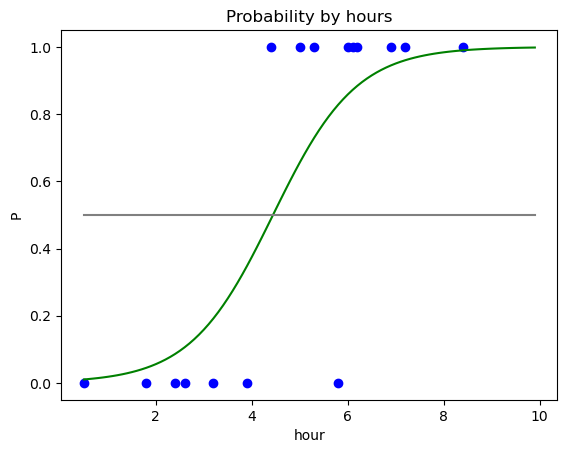

In [43]:
plt.scatter(X_train,y_train,color='blue') #산정도
plt.plot(X_range,p,color='green') # 선 그래프
plt.plot(X_range,np.full(len(X_range),0.5),color='gray') # 선 그래프
plt.title('Probability by hours') # 제목
plt.xlabel('hour') # X축제목
plt.ylabel('P') # Y축제목
plt.show()

### 데이터 시각화 (테스트세트)

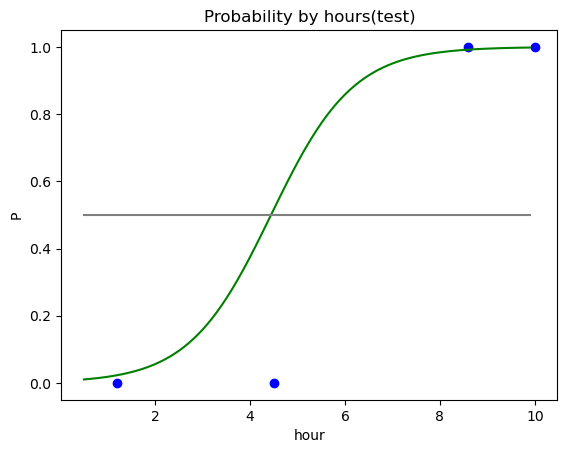

In [44]:
plt.scatter(X_test,y_test,color='blue') #산정도
plt.plot(X_range,p,color='green') # 선 그래프
plt.plot(X_range,np.full(len(X_range),0.5),color='gray') # 선 그래프
plt.title('Probability by hours(test)') # 제목
plt.xlabel('hour') # X축제목
plt.ylabel('P') # Y축제목
plt.show()

### 혼동 행렬 (Confursion Matrix)

In [49]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

# TRUE NAGATIVE (TN)          FALSE POSITIVE (FP)
# 불합격을 예측->불합격 실제  합격을 예측->불합격 실제
# FALSE NAGATIVE (FN)         TRUE POSITIVE (TP)
# 불합격을 예측->합격 실제    합격을 예측->합격 실제

array([[1, 1],
       [0, 2]], dtype=int64)